<a href="https://colab.research.google.com/github/sgspencer2618/MNIST_CNN_Handwritten_Digit_Recognition/blob/main/MNIST_CNN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition (MNIST) using a Convolutional Neural Network**

In [ ]:
# importing libraries and dependancies
import numpy as np
import time
import math
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

In [ ]:
# loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

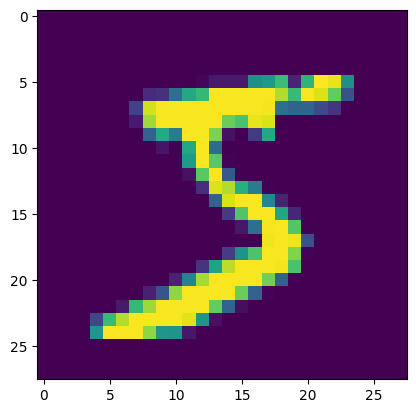

In [ ]:
# visualising first training example
plt.imshow(x_train[0])

In [ ]:
# checking training data shape
print(x_train[0].shape)

(28, 28)


In [ ]:
# reshaping data into what the model expects (60,000 training examples, 10,000 testing examples)
print(x_train.shape, x_test.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test =  x_test.reshape(x_test.shape[0], 28, 28, 1)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Create model
model = Sequential()

# adding layers to model
# I have found that this configuration works well, it reached 99% accuracy in 6 epochs
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 flatten_9 (Flatten)         (None, 43264)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                2768960   
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
Total params: 2774410 (10.58 MB)
Trainable params: 2774410 (10.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# training the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4113 - accuracy: 0.9266 - val_loss: 0.1172 - val_accuracy: 0.9671
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0858 - accuracy: 0.9755 - val_loss: 0.1166 - val_accuracy: 0.9701
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0623 - accuracy: 0.9807 - val_loss: 0.0946 - val_accuracy: 0.9744
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.1054 - val_accuracy: 0.9733
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.1378 - val_accuracy: 0.9713
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.1625 - val_accuracy: 0.9703
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.1598 - val_accurac

In [ ]:
num_predict = 8
predictions = model.predict(x_test[:num_predict])

1/1 [==============================] - 0s 59ms/step


In [ ]:
# print predictions
print(predictions)

[[6.1115968e-15 2.7917748e-12 3.1528360e-10 3.3225010e-11 2.7924309e-15
  6.1366372e-16 4.2015371e-24 9.9999976e-01 2.4163549e-13 2.5269898e-07]
 [7.2660571e-18 3.7643090e-17 1.0000000e+00 4.1460668e-17 4.6699965e-27
  2.9245085e-25 7.6982793e-22 6.9497749e-15 2.3941842e-16 3.7808205e-22]
 [9.8369488e-20 1.0000000e+00 4.2905419e-23 4.5228096e-28 1.9658427e-14
  9.5433308e-18 4.7488604e-20 5.7639737e-26 1.3646856e-16 3.0607859e-22]
 [1.0000000e+00 1.6587167e-19 4.1094862e-18 5.1026472e-25 1.3749186e-21
  1.3904911e-18 2.0429612e-17 1.0838016e-15 3.8762673e-17 1.6023880e-18]
 [8.0024095e-22 1.1369160e-14 4.0026026e-13 2.4409818e-27 1.0000000e+00
  5.1122498e-26 4.4973400e-16 6.1586529e-18 1.5068966e-17 2.5185823e-12]
 [2.8841273e-24 1.0000000e+00 6.1446452e-25 9.7512891e-33 4.0394804e-19
  4.4544363e-22 4.6908347e-26 7.8704451e-29 1.1108324e-16 2.7043507e-22]
 [3.5284068e-20 7.1674729e-11 3.4102844e-14 1.1737053e-19 1.0000000e+00
  1.9244638e-16 1.2560443e-13 8.0280682e-13 1.8215603e-11 

Predictions: [7, 2, 1, 0, 4, 1, 4, 9]
Real Values: [7, 2, 1, 0, 4, 1, 4, 9]


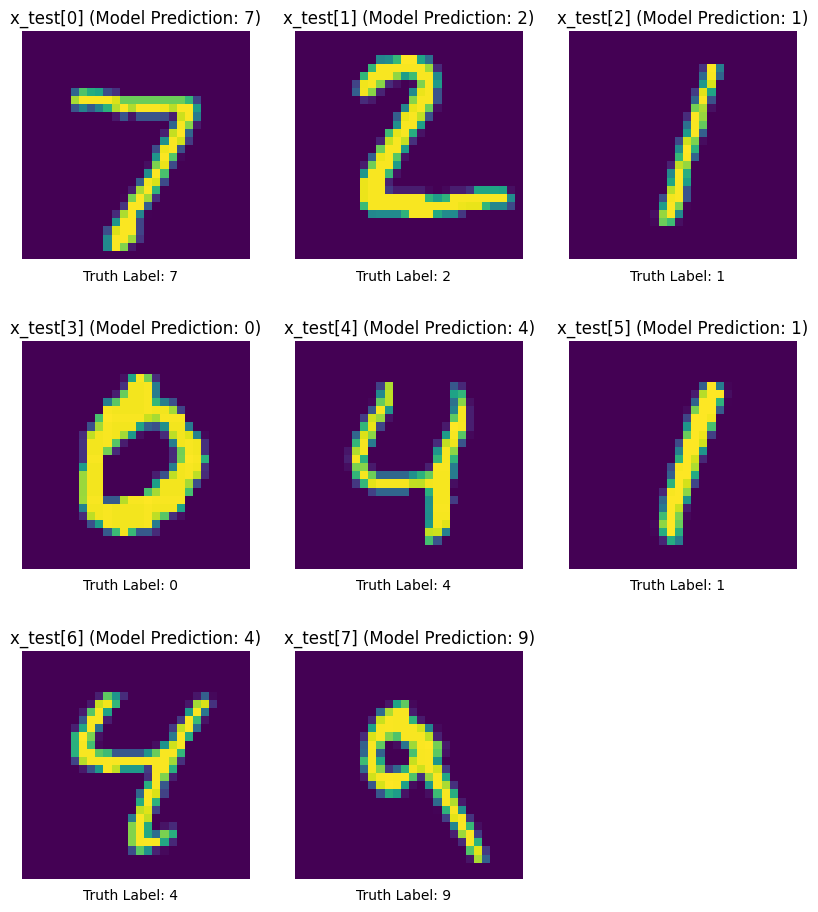

In [ ]:
# compare with truth labels
# using matplotlib to display the test images with truth labels and predicted values
fig = plt.figure(figsize=(10, math.ceil(num_predict / 3) ** 2 * 3.5))
rows = math.ceil(num_predict)
columns = 3

for i in range(1,num_predict + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(x_test[i-1])
  plt.axis('off')
  plt.title(f'x_test[{(i - 1)}] (Model Prediction: {np.argmax(predictions[i - 1])})')
  plt.text(7, 30, f"Truth Label: {np.argmax(y_test[i - 1])}")

predictions_print = [np.argmax(x) for x in predictions]
print("Predictions: " + str(predictions_print))

print("Real Values: " + str([np.argmax(x) for x in y_test[:num_predict]]))